In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

In [2]:
with MPRester("VK9U10BEjITOk1kneKKl") as m:

    phonon_bandstructure = m.get_phonon_bandstructure_by_material_id("mp-924128")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



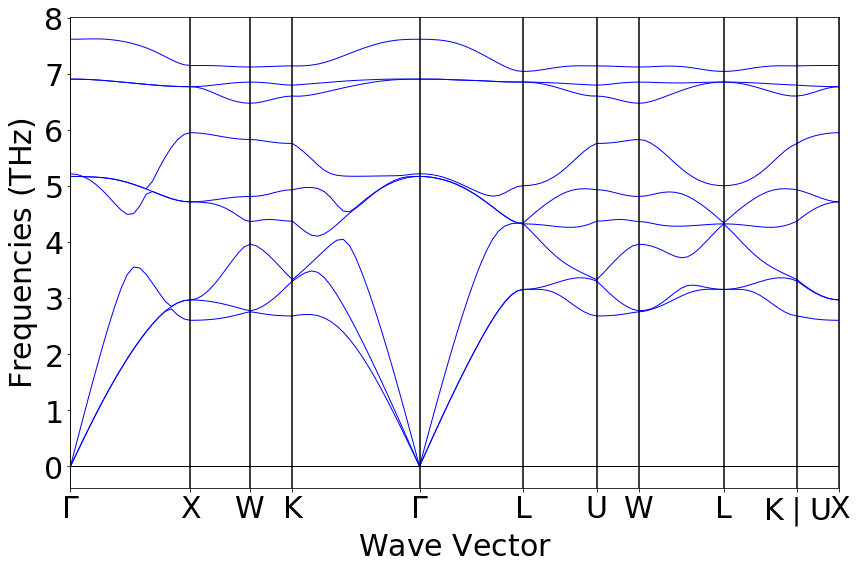

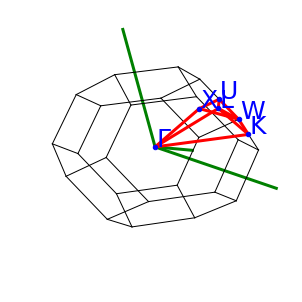

In [3]:
phonon_bsplotter = PhononBSPlotter(phonon_bandstructure)
phonon_bsplotter.get_plot()
plt.show()
phonon_bsplotter.plot_brillouin()

Pour déterminer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin, il faut trouver la pente de la droite approximant la branche acoustique quand $q$ est proche de l'extrémité d'une direction de la zone de Brillouin et $\omega$ est proche de 0.

En effet, la vitesse du son est donée par $$v_s = \frac{d\omega}{dq} \text{  avec $\omega$ proche de 0}$$.

In [4]:
data = phonon_bsplotter.bs_plot_data()
d = data.get('ticks').get('distance')
dist = np.array([d[1]-d[0], d[3]-d[1], d[5]-d[3], d[7]-d[5], d[9]-d[7], d[11]-d[9], d[13]-d[11], d[15]-d[13], d[17]-d[15], d[18]-d[17],])
directions = ["\u0393 - X","X - W", "W - K","K - \u0393","\u0393 - L","L - U", "U - W","W - L","L - K|U","K|U - X"]

In [5]:
q1 = data.get('distances')[0]
q2 = data.get('distances')[3]
q3 = data.get('distances')[4]

freq1 = data.get('frequency')[0][0]
freq2 = data.get('frequency')[3][1]
freq3 = data.get('frequency')[4][2]

x1 = np.array([q1[0],q1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)
a1 = np.linspace(q1[0],q1[-1],1000)
d1 =coef1[0]*a1+coef1[1]

x2 = np.array([q2[-1],q2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)
a2 = np.linspace(q2[0],q2[-1],1000)
d2 =coef2[0]*a2+coef2[1]

x3 = np.array([q3[0],q3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)
a3 = np.linspace(q3[0],q3[-1],1000)
d3 =coef3[0]*a3+coef3[1]

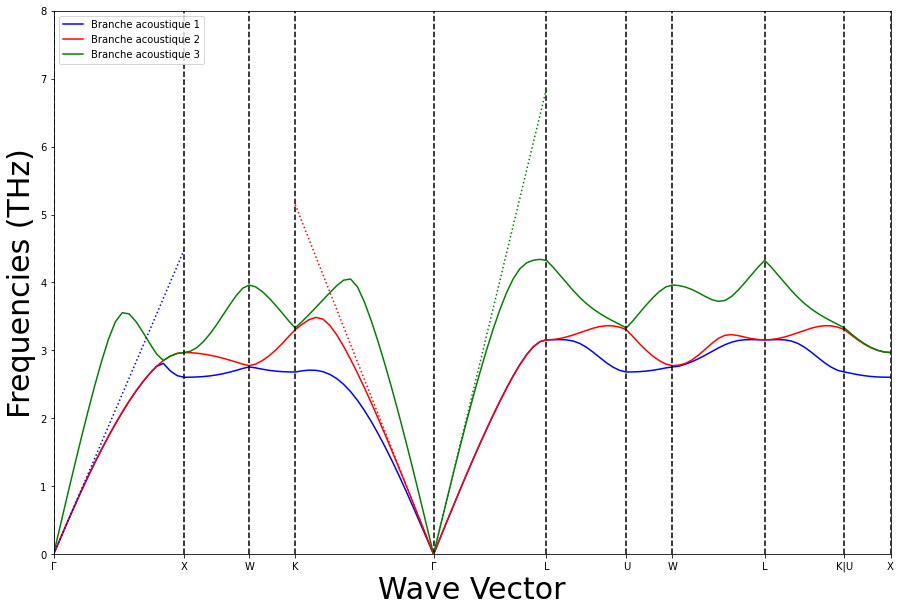

In [6]:
a = data.get('distances')
x = [y for b in a for y in b]

f1 = data.get('frequency')[0][0]
for i in range(1,10):
    f1 = np.concatenate((f1,data.get('frequency')[i][0]))

f2 = data.get('frequency')[0][1]
for i in range(1,10):
    f2 = np.concatenate((f2,data.get('frequency')[i][1]))

f3 = data.get('frequency')[0][2]
for i in range(1,10):
    f3 = np.concatenate((f3,data.get('frequency')[i][2]))


plt.figure(figsize=(15,10)) 
plt.plot(x,f1,color='b',label='Branche acoustique 1')
plt.plot(x,f2,color='r',label='Branche acoustique 2')
plt.plot(x,f3,color='g',label='Branche acoustique 3')

xs = [d[0],d[1],d[3],d[5],d[7],d[9],d[11],d[13],d[15],d[17],d[18]]
plt.xticks(xs,['\u0393',"X","W","K",'\u0393',"L","U","W","L","K|U","X"])

for di in xs :
    plt.axvline(di,color='black',ls='--')
    
plt.axis([0,d[-1],0,8])
plt.legend()
plt.xlabel("Wave Vector",fontsize=30)
plt.ylabel("Frequencies (THz)",fontsize=30)

plt.plot(a1,d1,color='b',ls=':')
plt.plot(a2,d2,color='r',ls=':')
plt.plot(a3,d3,color='g',ls=':')

plt.show()

Le graphe ci-dessus montre donc 3 bandes acoustiques différentes avec pour chacune une droite pointillée l'approximant quand $\omega$ tend vers 0 dans 3 directions différentes de la zone de Brillouin.

La vitesse du son se trouve ensuite aisément en prenant la pente des droites et en multipliant par $2\pi$. En effet, le graphe ci-dessus représente la fréquence en fonction de $q$, or la vitesse s'obtient avec $\omega$ et $\omega = 2\pi f$. De plus la fréquence du graphe est donnée en THz, il faut donc multiplier par $10^{12}$. Enfin, je suppose que $q$ est donné en $\frac{rad}{\mathring{A}}$, il faut donc également multiplier par $10^{-10}$ pour avoir la vitesse en $\frac{m}{s}$.

In [9]:
A = 1e-10
print("Vitesse du son pour la branche acoustique 1 = ", 2*math.pi*math.fabs(coef1[0])*1e12*A, "[m/s]")
print("Vitesse du son pour la branche acoustique 2 = ", 2*math.pi*math.fabs(coef2[0])*1e12*A, "[m/s]")
print("Vitesse du son pour la branche acoustique 3 = ", 2*math.pi*math.fabs(coef3[0])*1e12*A, "[m/s]")

Vitesse du son pour la branche acoustique 1 =  2707.6193878771433 [m/s]
Vitesse du son pour la branche acoustique 2 =  2935.8447492854702 [m/s]
Vitesse du son pour la branche acoustique 3 =  4790.96385806101 [m/s]
